In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("result/multiple/231019/multiple.csv", index_col=0)

In [4]:
# Casenameを_で分割して新しい列を作成
df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10']] = df['Casename'].str.split('_', expand=True)

C:\Users\44860\AppData\Local\Temp\ipykernel_27704\1216100616.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(df[var].unique()))


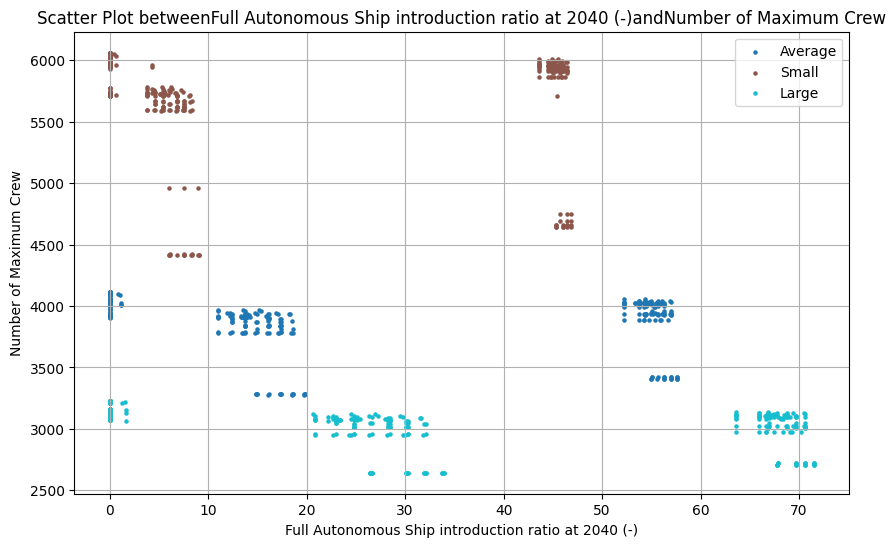

In [13]:
# カラーマップの設定
var='Var5'
v1='Full Autonomous Ship introduction ratio at 2040 (-)'
# v1='Introduction Year (Full)'
v2='Number of Maximum Crew'
# v2='Number of Maximum Growth Rate (%)'
# v2='Subsidy (USD)'

colormap = plt.cm.get_cmap('tab10', len(df[var].unique()))

# 散布図の描画
fig, ax = plt.subplots(figsize=(10, 6))

for idx, casename in enumerate(df[var].unique()):
    subset = df[df[var] == casename]
    ax.scatter(subset[v1], subset[v2],
               label=casename, color=colormap(idx), s=5)

# ラベルやタイトルの設定
ax.set_xlabel(v1)
ax.set_ylabel(v2)
ax.set_title('Scatter Plot between'+v1+'and'+v2)
ax.legend()

# グリッドを表示
ax.grid(True)

# グラフの表示S
plt.show()